In [1]:
pip install nltk pandas textblob pandas-profiling wordcloud matplotlib ipython


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.5.1 requires visions[type_image_path]==0.7.5, but you have visions 0.7.4 which is incompatible.



  Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.5
    Uninstalling visions-0.7.5:
      Successfully uninstalled visions-0.7.5


In [2]:
pip install --upgrade pandas-profiling


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install ydata_profiling

  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.5 which is incompatible.


C:\Users\Aditi Mitra\AppData\Local\Temp\ipykernel_952\580441518.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
[nltk_data] Downloading package punkt to C:\Users\Aditi
[nltk_data]     Mitra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Row 1: 'If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0'
Sentiment: Negative
Polarity: -0.25

Row 2: 'Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu'
Sentiment: Positive
Polarity: 0.5

Row 3: '@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3'
Sentiment: Positive
Polarity: 0.0

Row 4: '@brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW'
Sentiment: Positive
Polarity: 0.0

Row 5: '25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 
@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… https://t.co/MN0EEcsJHh'
Sentiment: Positive
Polarity: 0.0

Row 6: '#coronavirus #covid19 deaths continue to rise. It's almost  as bad a

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

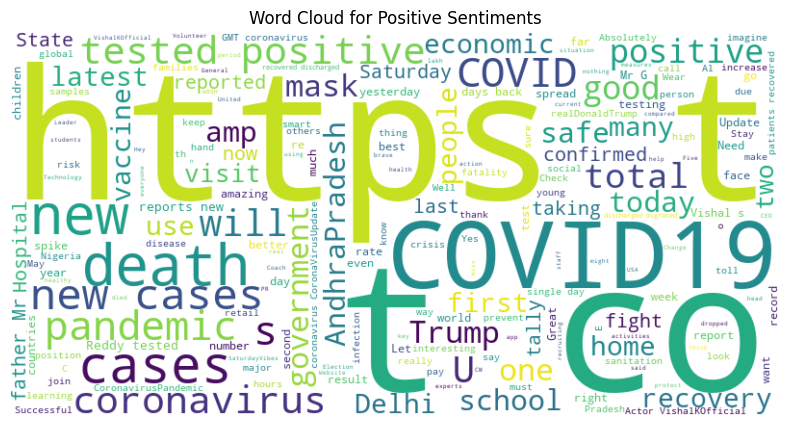

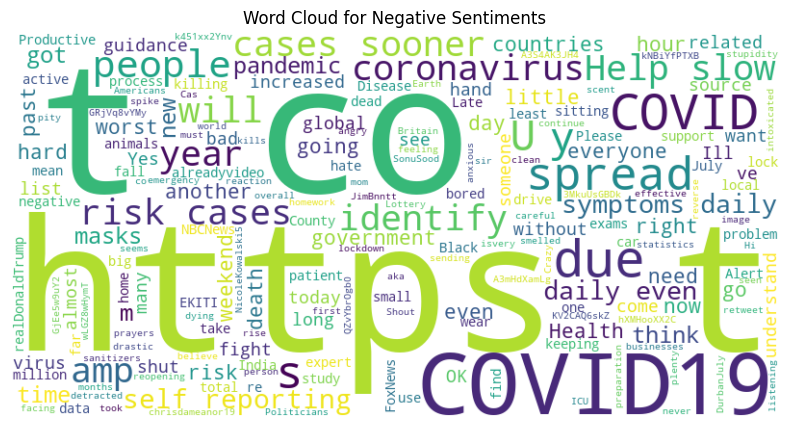

In [4]:
import nltk
import pandas as pd
from textblob import TextBlob
from pandas_profiling import ProfileReport
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from IPython.display import HTML, display, Image

# Set Matplotlib backend to display inline in the notebook
%matplotlib inline

# Download NLTK data (if not already downloaded)
nltk.download("punkt")

# Load the CSV dataset (replace 'covid19_tweets.csv' with your file path)
df = pd.read_csv('covid19_tweets.csv')

# Specify the name of the column containing the text to analyze
text_column = 'text'  # Replace 'text' with the actual column name

def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Sentiment polarity ranges from -1 (negative) to 1 (positive)
    return analysis.sentiment.polarity

# Sentiment Analysis
max_rows = 500
row_count = 0
positive_sentiments = []
negative_sentiments = []

for index, row in df.iterrows():
    if row_count >= max_rows:
        break  # Exit the loop after processing 200 rows

    text = row[text_column]

    polarity = analyze_sentiment(text)

    if polarity > 0:
        sentiment = "Positive"
        positive_sentiments.append(row)
    elif polarity < 0:
        sentiment = "Negative"
        negative_sentiments.append(row)

    print(f"Row {index + 1}: '{text}'")
    print(f"Sentiment: {sentiment}")
    print(f"Polarity: {polarity}\n")

    row_count += 1

# Create DataFrames containing rows with positive and negative sentiments
df_positive_sentiments = pd.DataFrame(positive_sentiments)
df_negative_sentiments = pd.DataFrame(negative_sentiments)

# Data Profiling for positive sentiments
profile_positive = ProfileReport(df_positive_sentiments)
profile_positive.to_file(output_file="Positive_Sentiments_Profile_Report.html")

# Data Profiling for negative sentiments
profile_negative = ProfileReport(df_negative_sentiments)
profile_negative.to_file(output_file="Negative_Sentiments_Profile_Report.html")

# Create and display the Word Clouds for positive and negative sentiments
positive_text = " ".join(df_positive_sentiments[text_column].tolist())
negative_text = " ".join(df_negative_sentiments[text_column].tolist())

# Word Cloud for Positive Sentiments
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Positive Sentiments")
plt.show()

# Word Cloud for Negative Sentiments
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Negative Sentiments")
plt.show()

# Save the Word Clouds as image files and display them
wordcloud_positive.to_file("positive_wordcloud.png")
wordcloud_negative.to_file("negative_wordcloud.png")


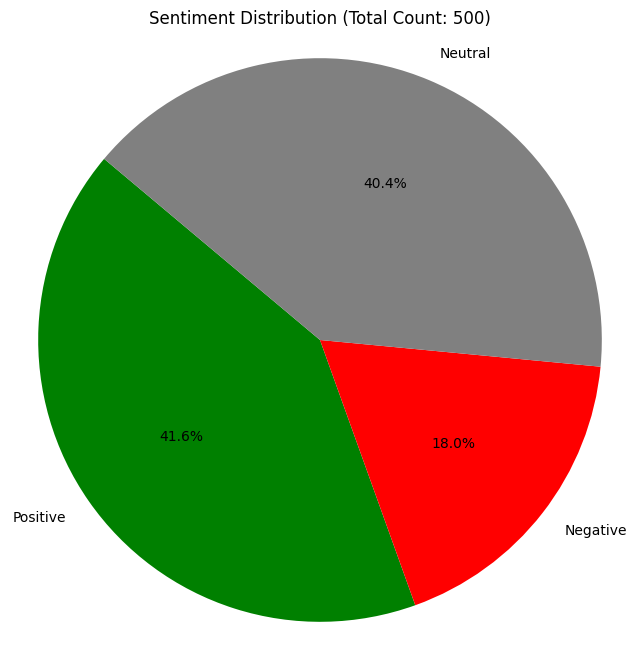

In [6]:


# Assuming you have already calculated positive_count and negative_count as the counts of positive and negative sentiments
positive_count = len(df_positive_sentiments)
negative_count = len(df_negative_sentiments)
# Calculate the count of the opposite sentiment
total_count = 500
neutral_count = total_count - (positive_count + negative_count)

# Create data for the pie chart
sentiments = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]
colors = ['green', 'red', 'gray']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=sentiments, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution (Total Count: 500)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Top 10 People by Tweet Count:
user_name
GlobalPandemic.NET        679
Coronavirus Updates       625
covidnews.ch              402
Open Letters              390
Blood Donors India        282
Hindustan Times           280
IAM Platform              266
Paperbirds_Coronavirus    259
IANS Tweets               244
ANI                       233
Name: count, dtype: int64


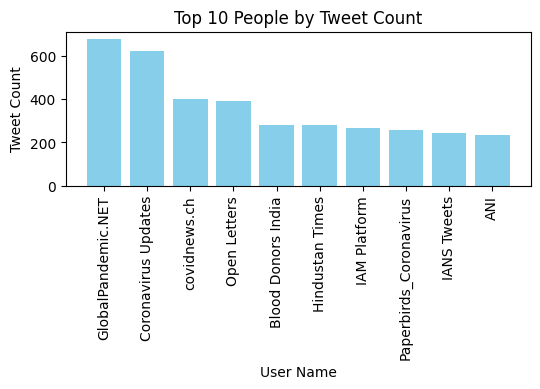

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV dataset (replace 'covid19_tweets.csv' with your file path)
df = pd.read_csv('covid19_tweets.csv')

# Extract the tweet counts for each user
tweet_counts = df['user_name'].value_counts()

# Select the top 10 people with the most tweets
top_10_people = tweet_counts.head(10)

# Display the list of top 10 people by tweet count
print("Top 10 People by Tweet Count:")
print(top_10_people)

# Create a vertical bar chart for the top 10 people
plt.figure(figsize=(6, 2))
plt.bar(top_10_people.index, top_10_people.values, color='skyblue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('User Name')
plt.ylabel('Tweet Count')
plt.title('Top 10 People by Tweet Count')
plt.show()


In [8]:
import pandas as pd

# Load data
data = pd.read_csv("covid19_tweets.csv", 
                   dtype={'Country/Region': str,
                          'Province/State': str,
                          'Latitude': float,
                          'Longitude': float,
                          'Confirmed': float,
                          'Recovered': float,
                          'Deaths': float})

# Rename columns
data = data.rename(columns={"Country/Region": "Country", "Province/State": "State"})

# Load tweet data
tweets = pd.read_csv("covid19_tweets.csv",
                     dtype={'user_name': str,
                            'user_location': str,
                            'user_description': str,
                            'user_followers': float,
                            'user_friends': float,
                            'user_favourites': float,
                            'user_verified': bool,
                            'text': str,
                            'hashtags': str,
                            'source': str,
                            'is_retweet': bool})

# Convert date columns to datetime
tweets['user_created'] = pd.to_datetime(tweets['user_created'])
tweets['date'] = pd.to_datetime(tweets['date'])

# Inspect data
print("Data Table:")
print(data.head(5))

# Inspect tweet data
print("\nTweet Data Table:")
print(tweets.head(2))


Data Table:
         user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf...  2017-02-12 06:45:15   

   user_followers  user_friends  user_favourites  user_verified  \
0             624           950            18775          False   
1            2253          1677               24           True   
2            9275          9525             7254          F

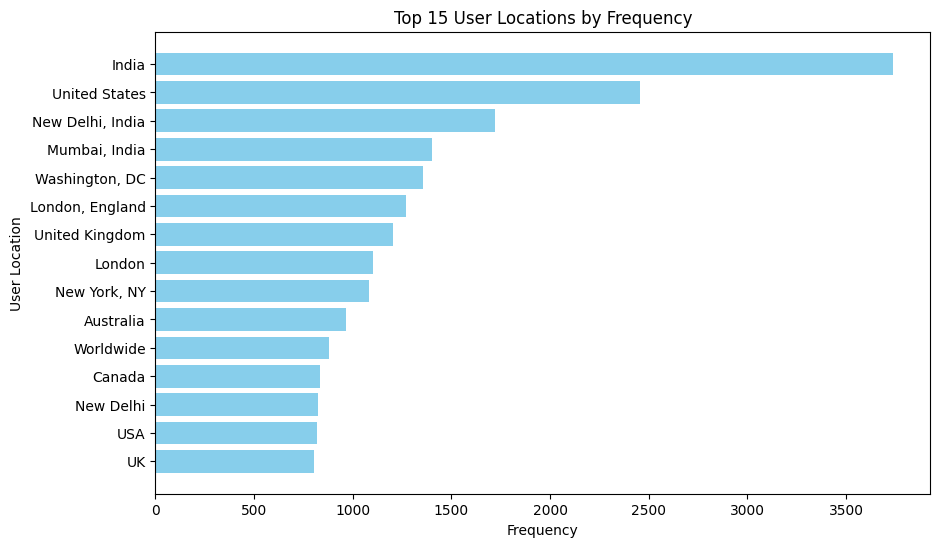

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV dataset (replace 'covid19_tweets.csv' with your file path)
df = pd.read_csv('covid19_tweets.csv')

# Assuming you have a column in your dataset that contains user locations, let's call it 'user_location'
user_location_column = 'user_location'  # Replace 'user_location' with the actual column name

# Extract all user locations
user_locations_all = df[user_location_column]

# Get the top 15 unique user locations and their frequencies
top_15_user_locations = user_locations_all.value_counts().head(15)

# Create a DataFrame to store the data
top_user_locations_df = pd.DataFrame({'User Location': top_15_user_locations.index, 'Frequency': top_15_user_locations.values})

# Create a bar chart for the top 15 user locations
plt.figure(figsize=(10, 6))
plt.barh(top_user_locations_df['User Location'], top_user_locations_df['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('User Location')
plt.title('Top 15 User Locations by Frequency')
plt.gca().invert_yaxis()  # Invert the y-axis to display the top location at the top
plt.show()


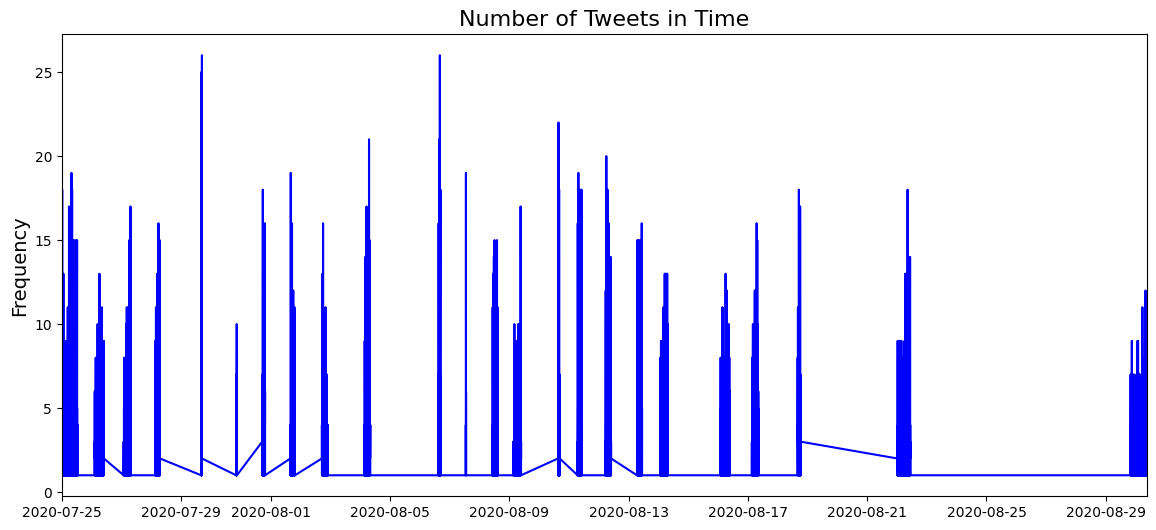

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the figure size
plt.rcParams['figure.figsize'] = (14, 6)

# Assuming you have a DataFrame called 'tweets' with a column 'date'

# Convert the 'date' column to datetime
tweets['date'] = pd.to_datetime(tweets['date'])

# Group by date and count the number of tweets
tweet_counts = tweets.groupby('date').size().reset_index(name='n')

# Create a line plot
plt.plot(tweet_counts['date'], tweet_counts['n'], linewidth=1.5, color='blue')

# Set the plot limits to not clip data points
plt.xlim(tweet_counts['date'].min(), tweet_counts['date'].max())

# Customize the plot appearance (you can define 'my_theme' and 'my_colors' separately)
plt.title("Number of Tweets in Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Remove x-axis title
plt.gca().set_xlabel('')

# Show the plot
plt.show()
